In [1]:
import warnings;
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
from fbprophet import Prophet

In [3]:
# set file path
file_path = '/Users/sebastian/Documents/Uni/Sheffield (MSc)/2. Semester/Data Analysis and Viz/spotify_audio_feature_analysis/'
data = pd.read_csv(file_path + 'data/5_clean_data.csv')

In [4]:
# convert date variable to date format
data['date'] = pd.DatetimeIndex(data['date'])

In [5]:
# subset data frame and rename columns
data2 = data[data['date'] < '2020-01-01']
data2 = data2[['valence', 'date']]
data2.columns = ['y', 'ds']

In [8]:
# build and train the model
m = Prophet(interval_width = 0.95, weekly_seasonality = True)
model = m.fit(data2)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods = 65, freq = 'W')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
216,2021-02-21,0.854770,0.439865,1.345264,0.764078,0.939055,0.034940,0.034940,0.034940,0.046961,0.046961,0.046961,-0.012021,-0.012021,-0.012021,0.0,0.0,0.0,0.889710
217,2021-02-28,0.855419,0.439046,1.312739,0.762348,0.942324,0.037457,0.037457,0.037457,0.046961,0.046961,0.046961,-0.009505,-0.009505,-0.009505,0.0,0.0,0.0,0.892875
218,2021-03-07,0.856067,0.447040,1.319314,0.760668,0.944749,0.039166,0.039166,0.039166,0.046961,0.046961,0.046961,-0.007795,-0.007795,-0.007795,0.0,0.0,0.0,0.895234
219,2021-03-14,0.856716,0.444244,1.340357,0.758988,0.948033,0.038687,0.038687,0.038687,0.046961,0.046961,0.046961,-0.008274,-0.008274,-0.008274,0.0,0.0,0.0,0.895403
220,2021-03-21,0.857364,0.467032,1.343928,0.757309,0.950860,0.037083,0.037083,0.037083,0.046961,0.046961,0.046961,-0.009878,-0.009878,-0.009878,0.0,0.0,0.0,0.894448


In [ ]:
forecast[['ds', 'yhat']]

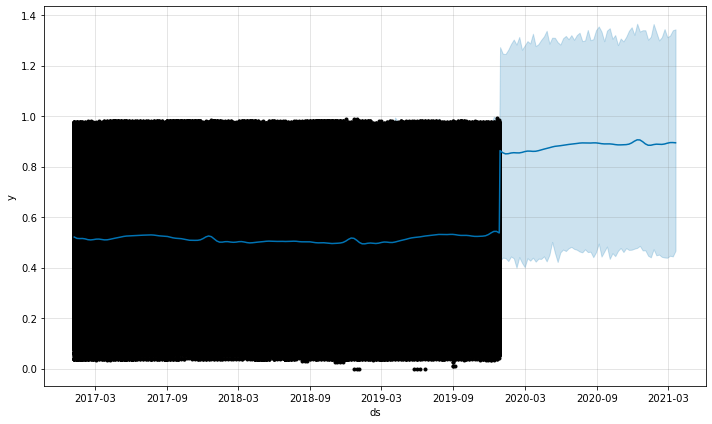

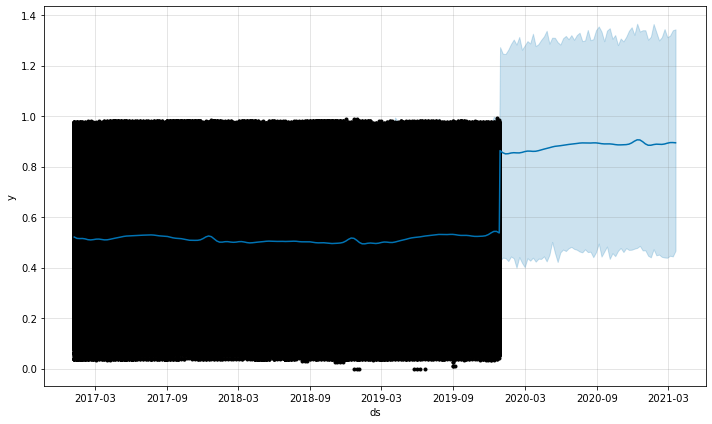

In [15]:
m.plot(forecast)